In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

json_path = "/Users/jowonkim/Documents/GitHub/Masterthesis/smoke-segmentation.v5i.coco-segmentation/test/_annotations.coco.json"

with open(json_path, "r") as f:
    data = json.load(f)

images = data['images']
categories = data['categories']
annotations = data['annotations']

# Extract category names and IDs for easy reference
category_names = {category['id']: category['name'] for category in categories}
category_ids = [category['id'] for category in categories]
category_names = [category['name'] for category in categories]

print(f"Number of images: {len(images)}")
print(f"Number of categories: {len(categories)}")
print(f"Number of annotations: {len(annotations)}")

Number of images: 900
Number of categories: 3
Number of annotations: 1209


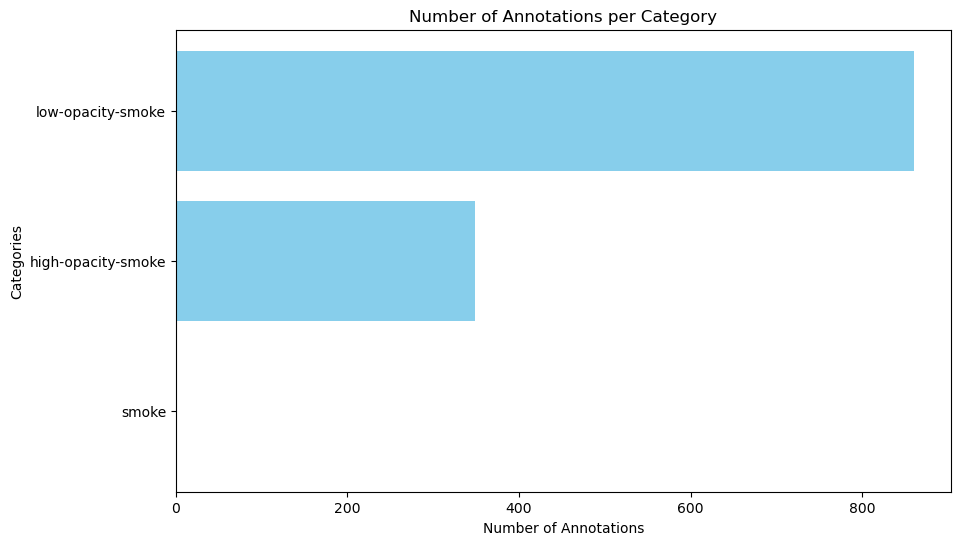

In [13]:
# Count annotations per category
category_counts = {category['id']: 0 for category in categories}
for annotation in annotations:
    category_counts[annotation['category_id']] += 1

categories_labels = [category_names[cat_id] for cat_id in category_counts.keys()]
category_values = list(category_counts.values())

plt.figure(figsize=(10, 6))
plt.barh(categories_labels, category_values, color='skyblue')
plt.xlabel('Number of Annotations')
plt.ylabel('Categories')
plt.title('Number of Annotations per Category')
plt.show()

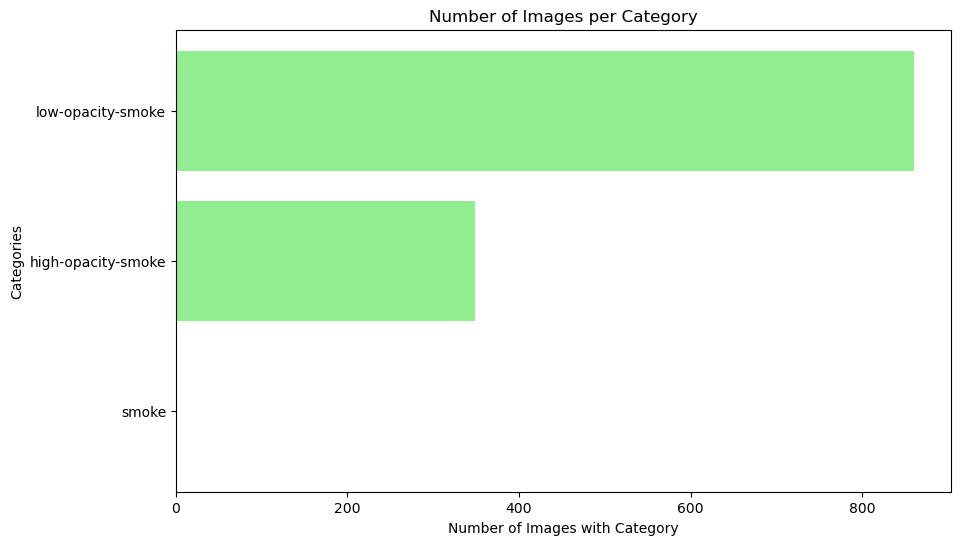

In [14]:
# Count how many images belong to each category (based on annotations)
image_category_counts = {image['id']: [] for image in images}
for annotation in annotations:
    image_category_counts[annotation['image_id']].append(annotation['category_id'])

# Create a dictionary of image counts per category
image_category_count = {category['id']: 0 for category in categories}
for image_id, category_ids_in_image in image_category_counts.items():
    for cat_id in category_ids_in_image:
        image_category_count[cat_id] += 1

category_images = [category_names[cat_id] for cat_id in image_category_count.keys()]
image_category_values = list(image_category_count.values())

plt.figure(figsize=(10, 6))
plt.barh(category_images, image_category_values, color='lightgreen')
plt.xlabel('Number of Images with Category')
plt.ylabel('Categories')
plt.title('Number of Images per Category')
plt.show()

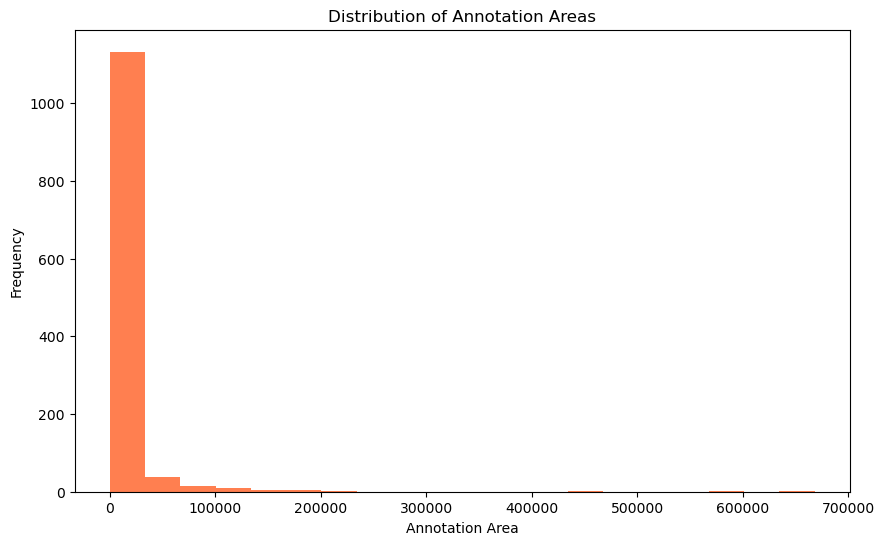

In [15]:
# Extract areas of annotations 
# area refers to the size of the object or region that is being annotated
areas = [annotation['area'] for annotation in annotations if 'area' in annotation]
#maybe can filter out small or large objects based on their area to focus on a specific range of object sizes.
plt.figure(figsize=(10, 6))
plt.hist(areas, bins=20, color='coral')
plt.xlabel('Annotation Area')
plt.ylabel('Frequency')
plt.title('Distribution of Annotation Areas')
plt.show()

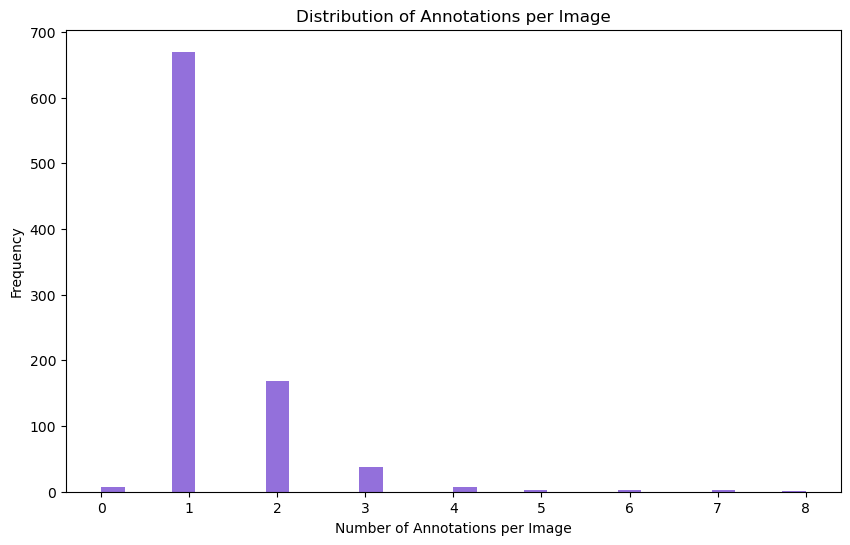

In [16]:
# Count number of annotations per image
image_annotation_counts = {image['id']: 0 for image in images}
for annotation in annotations:
    image_annotation_counts[annotation['image_id']] += 1

# Prepare data for plotting
image_ids = list(image_annotation_counts.keys())
annotation_counts = list(image_annotation_counts.values())

plt.figure(figsize=(10, 6))
plt.hist(annotation_counts, bins=30, color='mediumpurple')
plt.xlabel('Number of Annotations per Image')
plt.ylabel('Frequency')
plt.title('Distribution of Annotations per Image')
plt.show()